### นาย ณภัทรนันท์ ศิลปะ 6421600069

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [58]:
sal = pd.read_csv('ds_salaries.csv',encoding = 'iso-8859-1')

In [59]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [60]:
sal.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


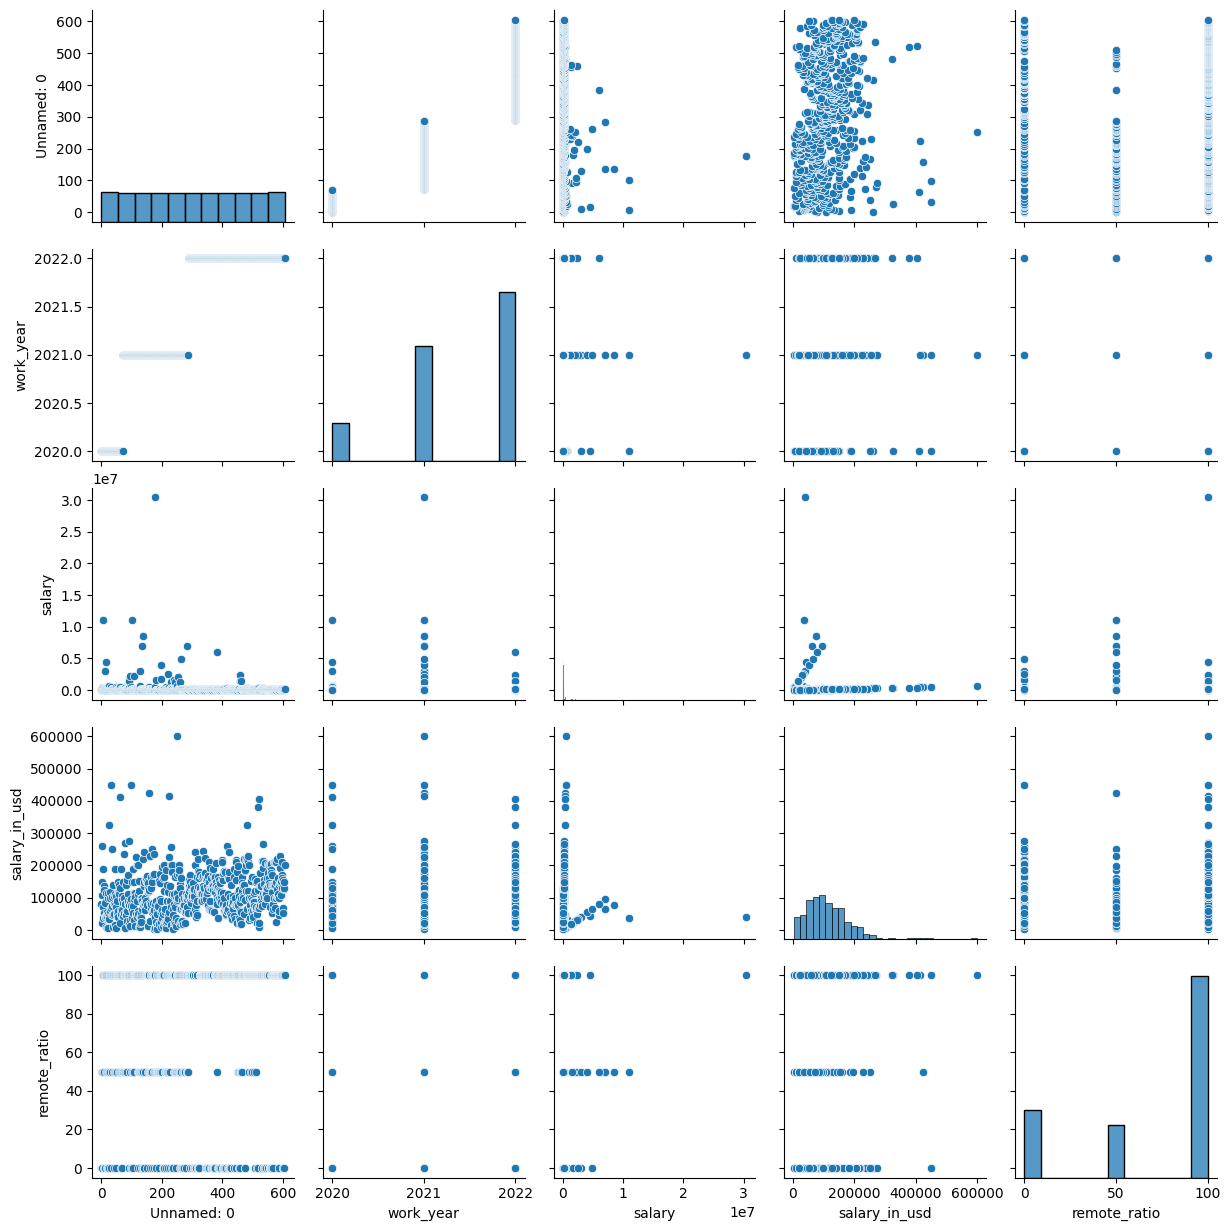

In [61]:
sns.pairplot(data=sal)

In [62]:
sal2 = sal[['Unnamed: 0','salary_in_usd']].dropna()
# df2 = df[['displacement','horsepower']].dropna()

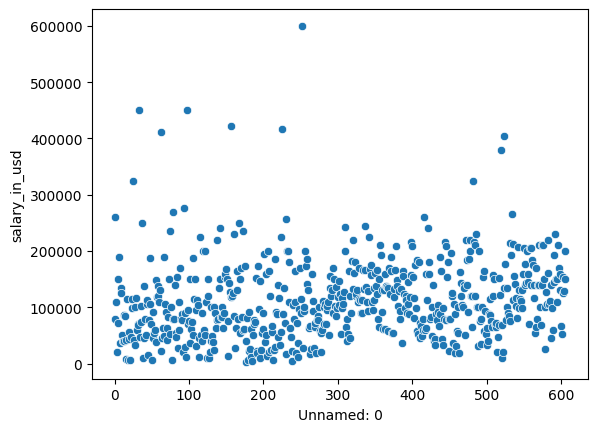

In [63]:
sns.scatterplot(data=sal2 , x='Unnamed: 0',y='salary_in_usd')
plt.show()

In [64]:
model = KMeans(n_clusters=4,random_state=0)
model.fit(sal2)

KMeans(n_clusters=4, random_state=0)

In [65]:
model.cluster_centers_

array([[3.19751004e+02, 1.08264912e+05],
       [3.48960526e+02, 1.86111546e+05],
       [2.37600000e+02, 4.18500000e+05],
       [2.49413265e+02, 4.45555561e+04]])

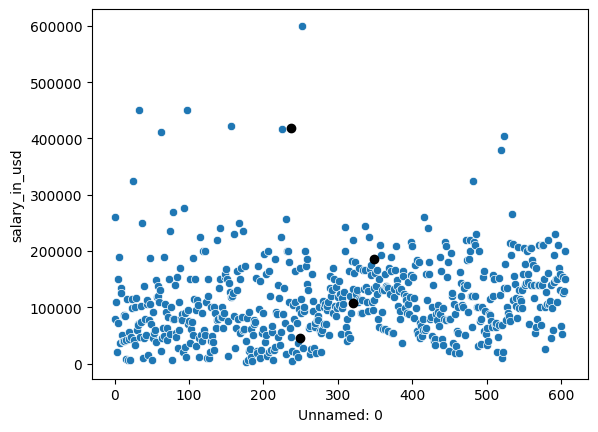

In [66]:
sns.scatterplot(data=sal2 , x='Unnamed: 0',y='salary_in_usd')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='#000')
plt.show()

In [67]:
model.labels_

array([0, 1, 0, 3, 1, 3, 1, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 2, 3, 3, 0, 0, 3, 3, 3, 2, 3, 3, 0, 1, 3, 0, 3, 0, 3, 0,
       0, 3, 0, 1, 0, 3, 3, 0, 3, 3, 3, 1, 3, 0, 0, 0, 0, 0, 3, 2, 3, 3,
       3, 1, 0, 0, 3, 3, 0, 1, 1, 3, 0, 3, 1, 0, 0, 0, 3, 3, 1, 3, 3, 0,
       1, 0, 0, 0, 3, 1, 3, 0, 3, 2, 3, 0, 3, 1, 3, 3, 3, 3, 1, 0, 1, 3,
       0, 0, 0, 3, 3, 1, 3, 3, 0, 1, 3, 1, 3, 0, 3, 1, 0, 3, 3, 3, 0, 3,
       3, 3, 0, 0, 3, 0, 1, 0, 0, 1, 1, 0, 0, 0, 3, 0, 1, 1, 1, 1, 3, 3,
       0, 0, 0, 2, 0, 0, 1, 0, 3, 3, 0, 1, 0, 1, 3, 1, 1, 0, 3, 1, 3, 1,
       3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 1, 3, 3, 1, 0, 0, 3, 3,
       3, 0, 3, 1, 3, 3, 1, 3, 1, 1, 3, 0, 3, 3, 3, 3, 3, 1, 3, 0, 0, 0,
       3, 0, 3, 3, 1, 2, 0, 0, 0, 3, 3, 1, 1, 1, 1, 0, 3, 3, 3, 3, 0, 0,
       0, 1, 3, 3, 3, 3, 0, 1, 0, 0, 2, 3, 0, 0, 1, 1, 1, 0, 0, 3, 3, 3,
       3, 1, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3, 0, 3, 0,
       0, 0, 3, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

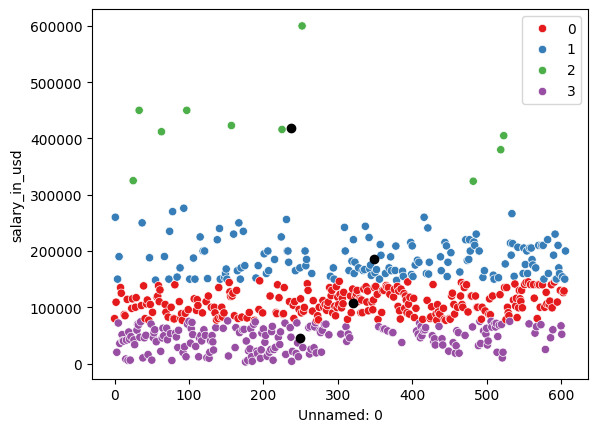

In [68]:
sns.scatterplot(data=sal2 , x='Unnamed: 0',y='salary_in_usd',hue=model.labels_ ,palette='Set1')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='#000')
plt.show()

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(sal2)

StandardScaler()

In [70]:
sal2[['Unnamed: 0','salary_in_usd']] = scaler.transform(sal2)
sal3= sal[['Unnamed: 0','salary_in_usd']].dropna()

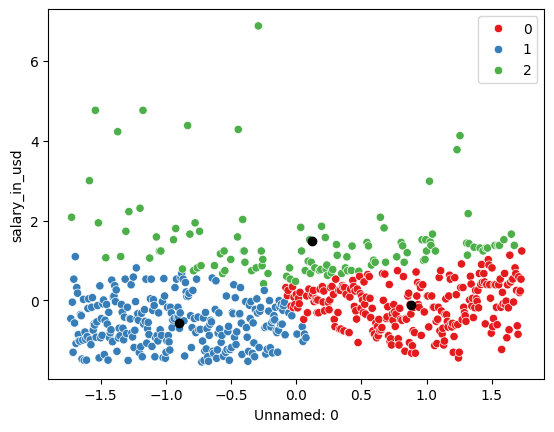

In [71]:


model = KMeans(n_clusters=3,random_state=0)
model.fit(sal2)

sns.scatterplot(data=sal2 , x='Unnamed: 0',y='salary_in_usd',hue=model.labels_ ,palette='Set1')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='#000')
plt.show()

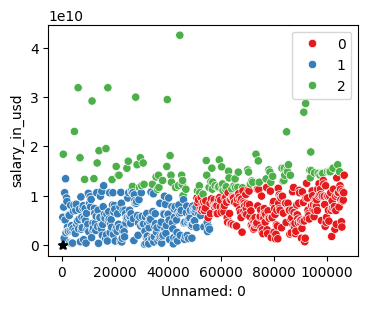

In [72]:
sal3[['Unnamed: 0','salary_in_usd']] = scaler.inverse_transform(sal3)

plt.figure(figsize=[4,3])
sns.scatterplot(data=sal3 , x='Unnamed: 0',y='salary_in_usd',hue=model.labels_ , palette='Set1')
center = scaler.inverse_transform(model.cluster_centers_)
plt.scatter(center[:,0],center[:,1],color='#000',marker='*')
plt.show()